# Solution lab matplotlib-seaborn

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp

# Para que las visualizaciones aparezcan debajo de las celdas
%matplotlib inline 

# Challenge 1

#### Data

In [2]:
x = np.arange(0, 100)
y = x * 2
z = x ** 2

#### Plot (x,y) and (x,z) on the axes.
There are 2 ways of doing this. Do in both ways.
Hint: Check out the nrows, ncols, and index arguments of subplots

Also, play around with the linewidth and style. Use the ones you're most happy with.

In [3]:
plt.style.use('seaborn')

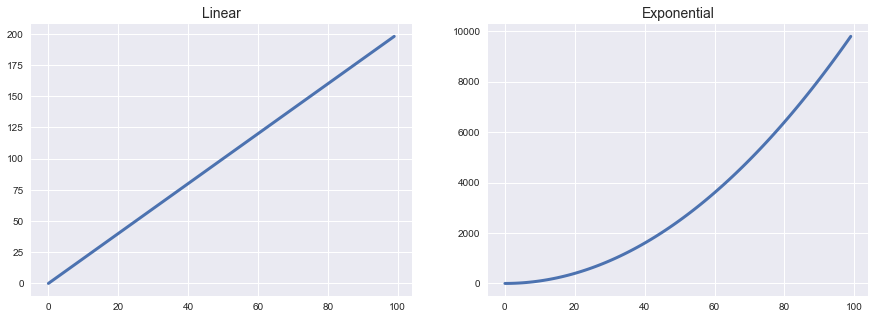

In [4]:
# your code here-1st way
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y, linewidth=3)
plt.title('Linear', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(x, z, linewidth=3)
plt.title('Exponential', fontsize=14)

plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot below

Text(0.5, 1.0, 'Exponential')

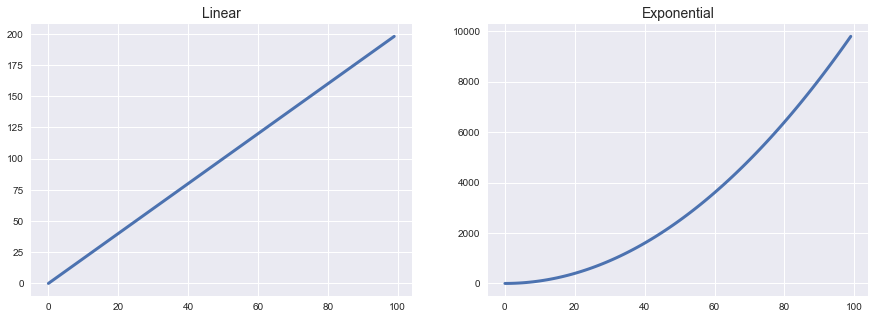

In [5]:
# your code here-2st way
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(x, y, linewidth=3)
axes[0].set_title('Linear', fontsize=14)

axes[1].plot(x, z, linewidth=3)
axes[1].set_title('Exponential', fontsize=14)

#### Augmenting your previous code, resize your previous plot.
Hint: Add the figsize argument in plt.subplots()

Text(0.5, 1.0, 'Exponential')

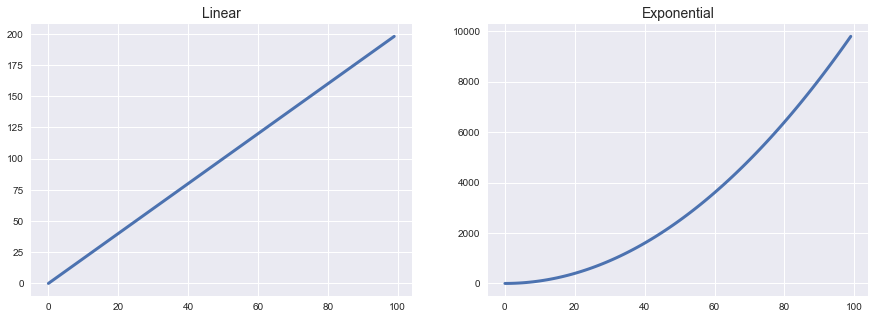

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(x, y, linewidth=3)
axes[0].set_title('Linear', fontsize=14)

axes[1].plot(x, z, linewidth=3)
axes[1].set_title('Exponential', fontsize=14)

#### Plot both y=x^2 and y=exp(x) in the same plot using normal and logarithmic scale.
Hint: Use set_xscale and set_yscale

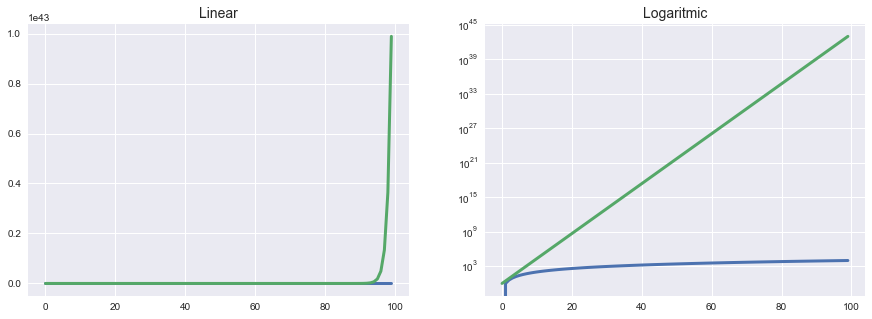

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(z, label='quadratic', linewidth=3)
exp_x = [exp(i) for i in x]
ax[0].plot(exp_x, label='exponential', linewidth=3)
ax[0].set_xscale('linear')
ax[0].set_yscale('linear')
ax[0].set_title('Linear', fontsize=14)

ax[1].plot(z, label='quadratic', linewidth=3)
ax[1].plot(exp_x, linewidth=3)
ax[1].set_yscale('log')
ax[1].set_title('Logaritmic', fontsize=14)
plt.show()

# Challenge 2

#### Import the Fitbit2.csv file and name your dataset fitbit

In [8]:
fitbit = pd.read_csv('your-code/Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?
Is Fitbitter more active on weekend or workdays?
All plots must be in the same jupyter notebook cell.
Hints:

Use Months_encoded and Week_or Weekend columns
Use matplolib.pyplot object oriented API
Set your size figure to 12,4
Explore plt.sca
Explore plt.xticks
Save your figures

In [9]:
## Para la gráfica de Median steps by month
# Agrupamos según el mes
monthly_steps = fitbit['Steps'].groupby(fitbit['Months']).median()

# Acortamos los nombres de los meses y los ordenamos
monthly_steps.index = monthly_steps.index.str[:3]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_steps = monthly_steps.reindex(reversed(months))
monthly_steps

Months
Dec     8531.0
Nov     9453.5
Oct     7865.0
Sep     9343.0
Aug    12213.0
Jul    10644.0
Jun    12935.5
May    11998.0
Apr    13846.5
Mar    11122.0
Feb     9235.0
Jan    10366.0
Name: Steps, dtype: float64

In [10]:
## Para la gráfica de Work vs Weekend
work_weekend = fitbit['Steps'].groupby(fitbit['Work_or_Weekend']).median()

# Desde aquí ya estoy editando las etiquetas, pero otra opción es editarlas directamente en la gráfica con xticks
work_weekend.index = ['Work', 'Weekend']
work_weekend

Work        9998.0
Weekend    10445.5
Name: Steps, dtype: float64

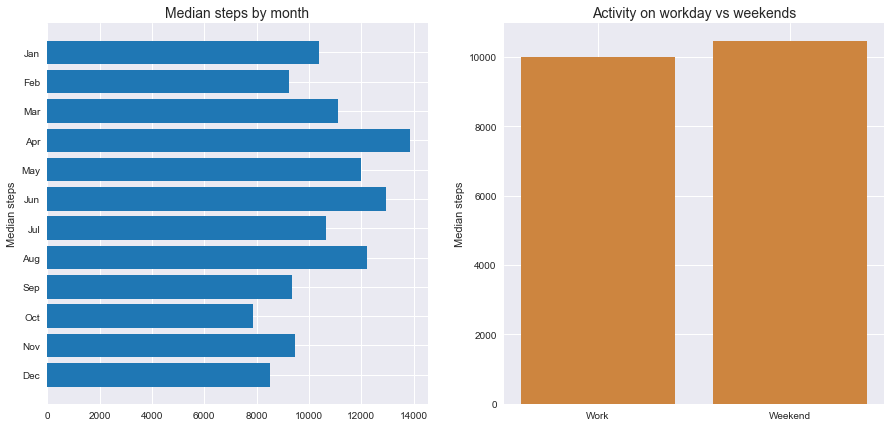

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Median steps by month
ax[0].set_title('Median steps by month', fontsize=14)
ax[0].barh(monthly_steps.index, monthly_steps.values, color='tab:blue')
ax[0].set_ylabel('Median steps')

# Activity workday vs weekend
ax[1].set_title('Activity on workday vs weekends', fontsize=14)
ax[1].bar(work_weekend.index, work_weekend.values, .8, color='peru')
ax[1].set_ylabel('Median steps')

plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

Minutes Lightly Active vs Steps
Minutes Very Active vs Steps
Minutes Sedentary vs Steps

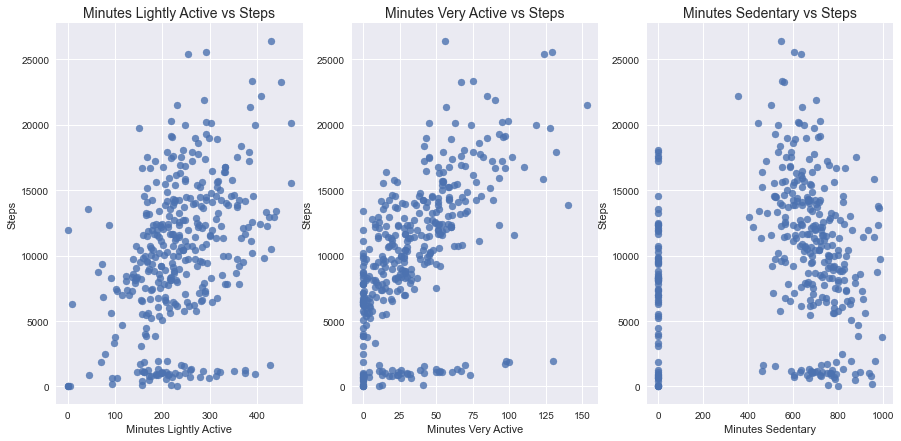

In [12]:
cols = ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']
fig, ax = plt.subplots(1, 3, figsize=(15, 7))

for i in range(3):
    col = cols[i]
    ax[i].set_title(col + ' vs Steps', fontsize=14)
    ax[i].scatter(fitbit[col], fitbit['Steps'], alpha = 0.8)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Steps')

plt.show()

# Challenge 3

#### Open the titanic file. Name your dataset titanic

In [13]:
# your code here
titanic = pd.read_csv('your-code/titanic.csv', low_memory=False)
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


#### Explore the titanic dataset using Pandas dtypes

In [14]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
Hint: Use Pandas select_dtypes

In [15]:
# your code here - numerical variable

## Opción 1
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
titanic.select_dtypes(include=numerics)

## Opción 2
titanic.select_dtypes(exclude=object).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [16]:
#your code here- categorical variable
titanic.select_dtypes(include=object).head(4)

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S


#### Set the plot style to classic and the figure size to (12,6)
Hint: To set the style you can use matplotlib.pyplot functions or seaborn 

In [17]:
# your code here
plt.style.use('classic')
plt.rcParams['figure.figsize'] = (12, 6)

#### Use the right visulalization to show the distribution of the column Age

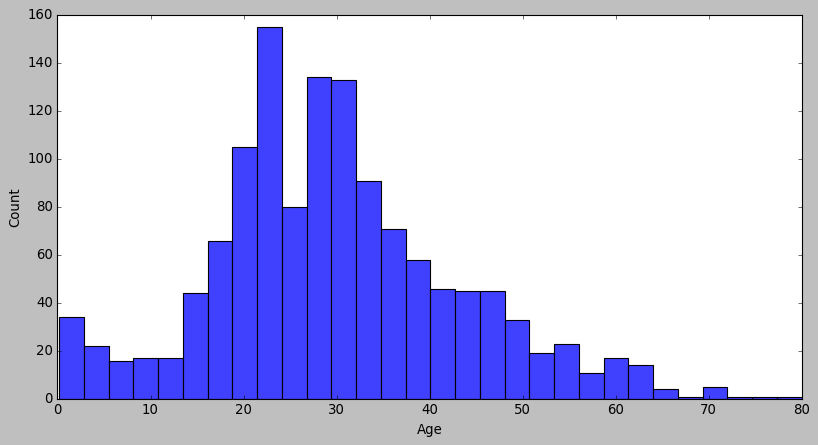

In [18]:
sns.histplot(data=titanic, x='Age');

#### Use subplots and plot the distribution of the Age variable with bins equal to 10,20 and 50.

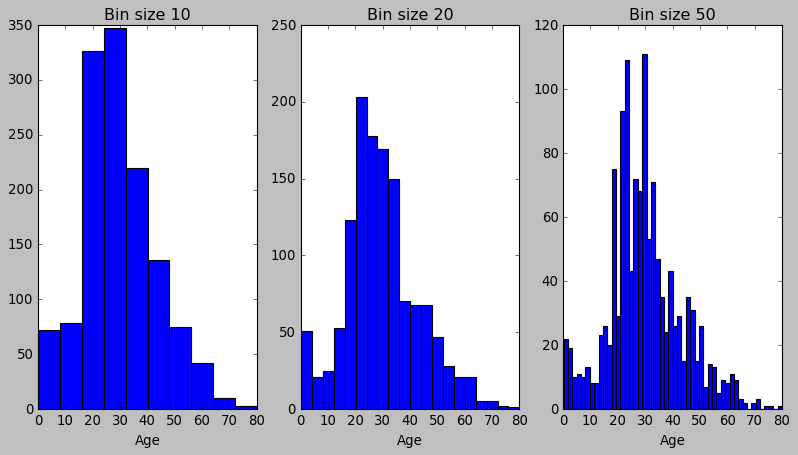

In [19]:
# your code here
fig, ax = plt.subplots(1, 3)
bin_sizes = [10, 20, 50]

for i in range (3):
    ax[i].set_title(f'Bin size {bin_sizes[i]}')
    ax[i].hist(data=titanic, x='Age', bins=bin_sizes[i])
    ax[i].set_xlabel('Age')
        
plt.show()

#### How does the bin size affect your plot? Comment.

In [20]:
#your comment here
# See below

The smaller the bin size, the more elements we have in each bin; therefore, the frequency (y axis) has larger values. Moreover, if we have too many bins, it can be difficult to spot patterns. Thus, it might be advisable to strike for a "sweet spot"; either 10 or 20 sized-bins seem like a good option. 

#### Use seaborn to show the distribution of the column Age

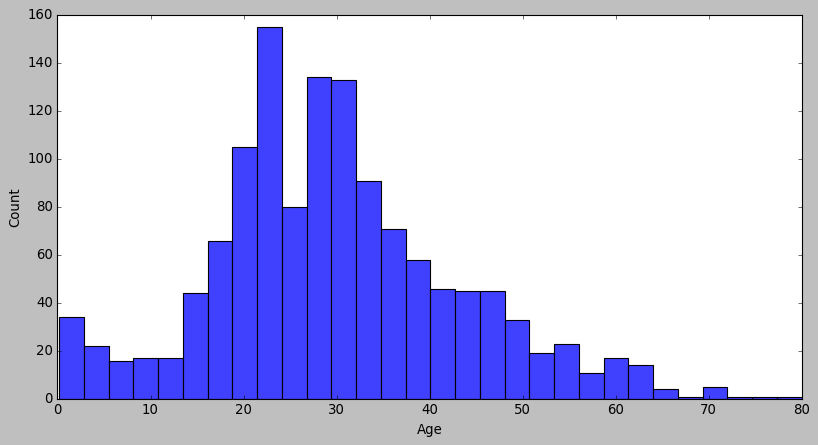

In [21]:
# your code here
sns.histplot(titanic['Age']);

#### Use the right plot to visualize the column Gender. There are 2 ways of doing it. Do it both ways.
Hint: Use matplotlib and seaborn

In [22]:
titanic['Gender'].value_counts().index

Index(['male', 'female'], dtype='object')

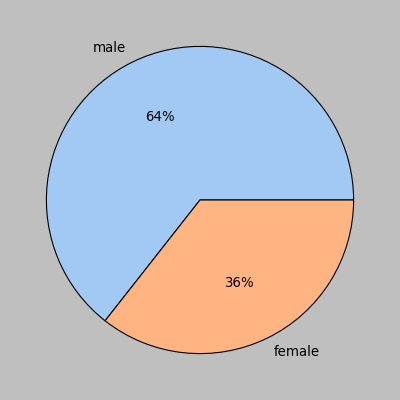

In [23]:
# Option 1
plt.pie(x=titanic['Gender'].value_counts(), # Agrupamos los valores 
        labels=titanic['Gender'].value_counts().index, 
        colors = sns.color_palette('pastel'), # Cambiamos el color para que el área se logre ver
        autopct='%.0f%%') # Agregamos las etiquetas numéricas

plt.show()

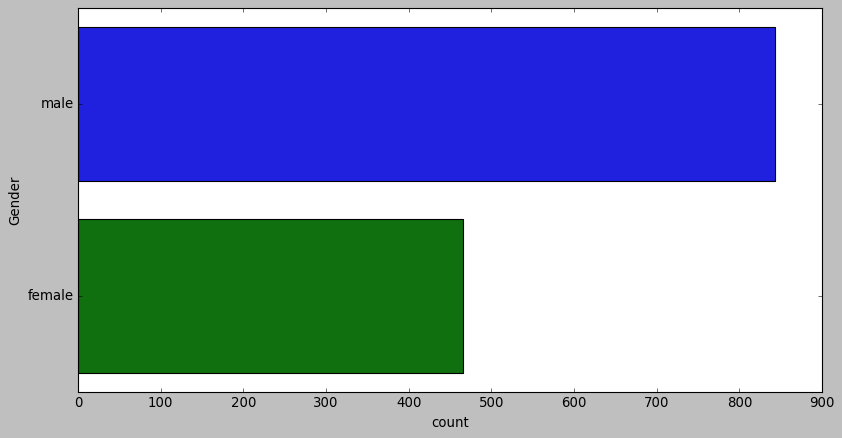

In [24]:
# Option 2
sns.countplot(y='Gender', data=titanic, orient='h');

#### Use the right plot to visualize the column Pclass

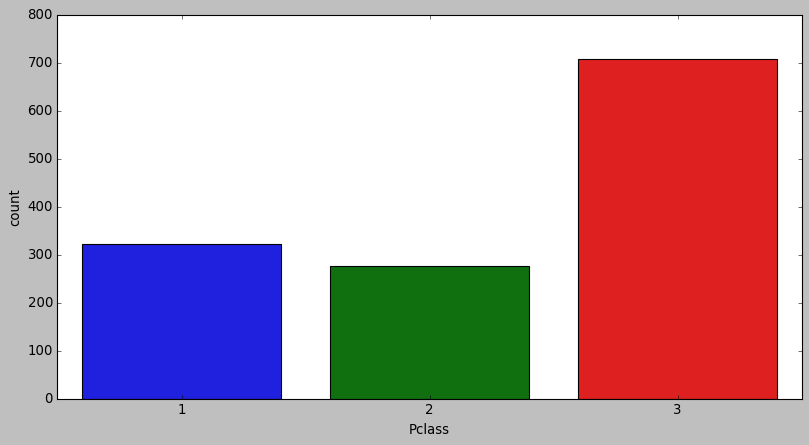

In [25]:
sns.countplot(x='Pclass', data=titanic);

#### We would like to have in one single plot the summary statistics of the feature Age. What kind of plot would you use?

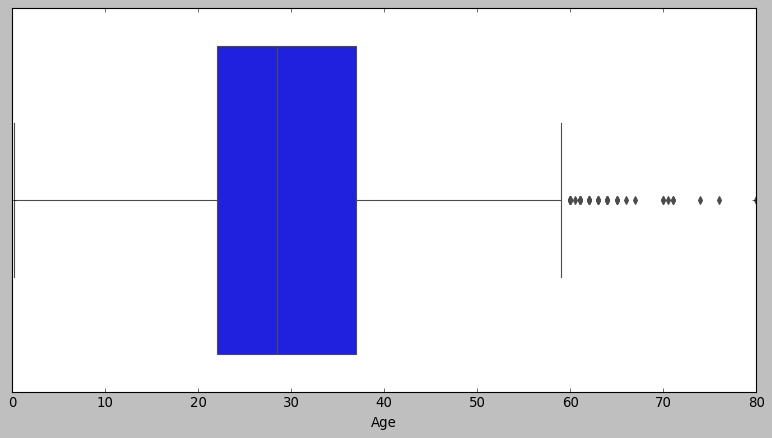

In [26]:
sns.boxplot(x='Age', data=titanic);

#### What does the last plot tells you about the feature Age? Comment.

In [27]:
# your comment here
# See below

Half of the passengers were young: between ~22 and ~38 years of age. The rest were of all ages, from newborns to people in their 70s.

#### Now in addition to the summary statistics, we want to have in the SAME plot the distribution of Age. What kind of plot would you use?

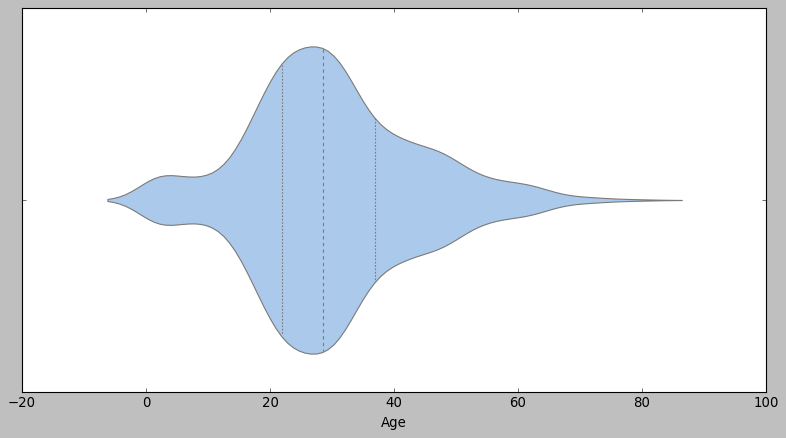

In [28]:
#your code here
sns.violinplot(x="Age", data=titanic, palette='pastel', inner='quartile');

#### What additional information the last plot provides you about the feature Age? Comment.

In [29]:
#your comment here
# See below

Besides 20-40 year olds, the second most common group were people in their 40's. 

#### We suspect that there is a linear relationship between Fare and Age. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
Hint: One of the ways involves using Seaborn

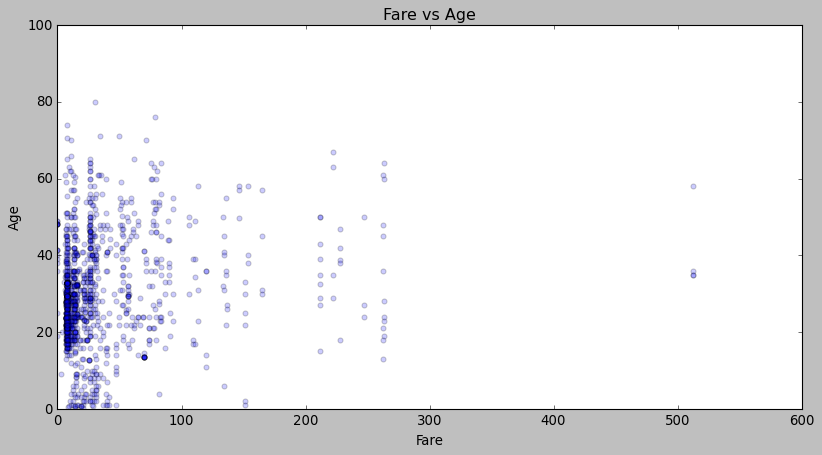

In [30]:
#your code- 1st way
plt.scatter(x='Fare', y='Age', data=titanic, alpha=0.2)
plt.title('Fare vs Age')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.xlim(left=0) # Para que la gráfica no nos muestre valores negativos
plt.ylim(bottom=0)
plt.show()

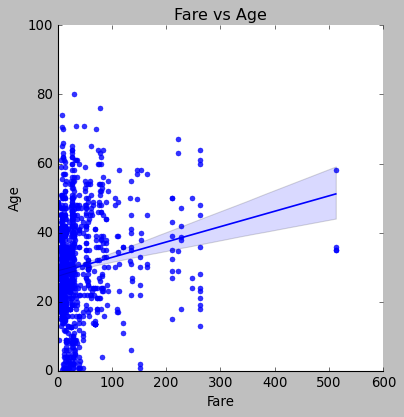

In [31]:
sns.lmplot(x='Fare', y='Age', data=titanic)
plt.title('Fare vs Age')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.xlim(left=0) # Para que la gráfica no nos muestre valores negativos
plt.ylim(bottom=0);

#### Using Seaborn plot the correlation matrix 

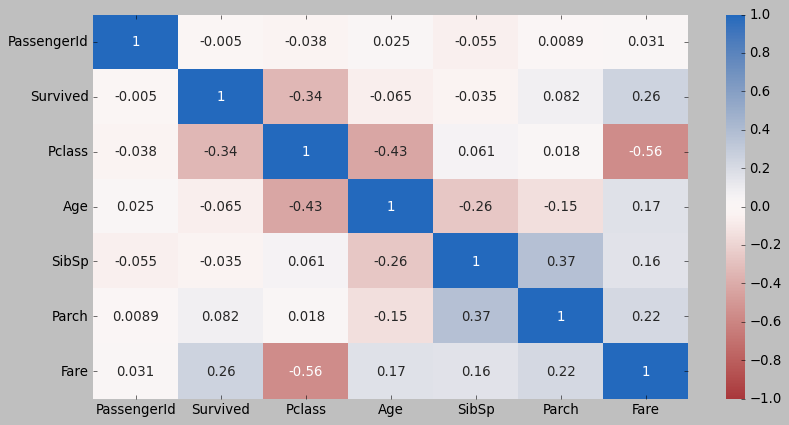

In [32]:
#your code here

# Le agregamos vmin para que comience el colormap desde -1, y no desde el valor más bajo de nuestros datos
# Le agregamos anotaciones para hacer comparaciones más fácilmente. 
sns.heatmap(titanic.corr(), vmin=-1, cmap='vlag_r', annot=True);

#### What are the most correlated feature? Comment

In [33]:
#your comment here
# See below

The most correlated are Fare and Pclass, followed by SibSp and Parch.

#### Use the right plot to display the summary statistics of the Age in function of the Pclass

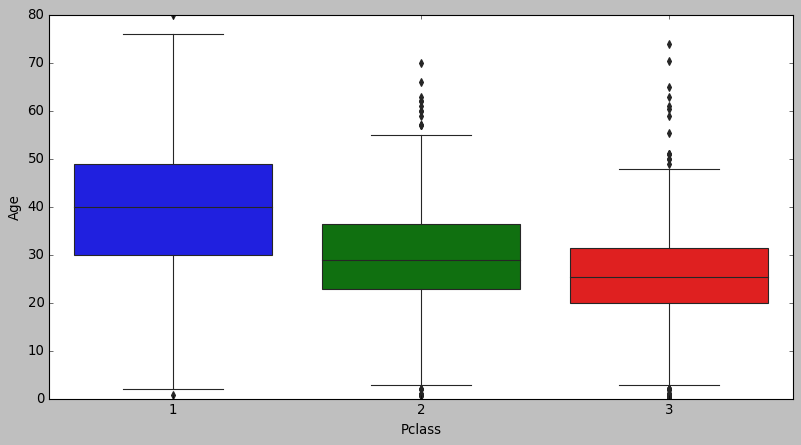

In [34]:
sns.boxplot(x='Pclass', y='Age', data=titanic);

#### Use the seaborn to plot the distribution of the Age based on the Gender
Hint: Use Facetgrid

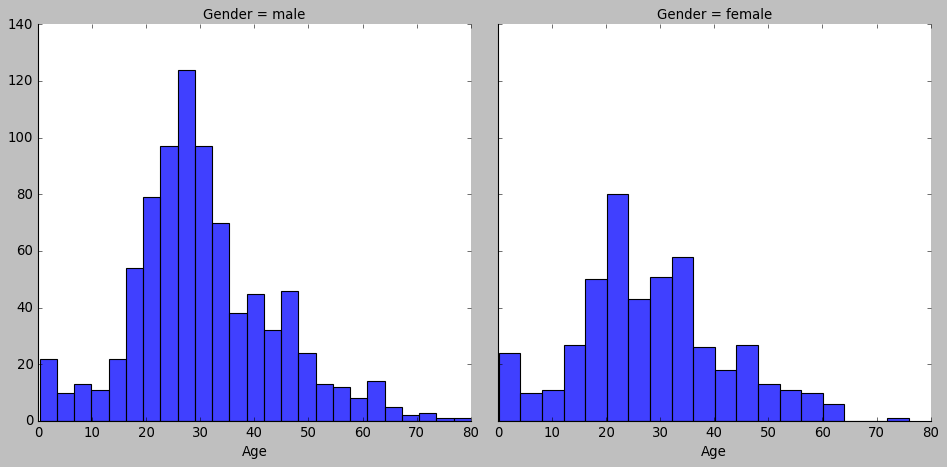

In [41]:
g = sns.FacetGrid(data=titanic, col='Gender', height=6)
g.map(sns.histplot, 'Age');